<a href="https://colab.research.google.com/github/akshayerk12/airline/blob/master/AIRLINE_TICKET_PRICE_PREDICTOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Airline_new/Clean_Dataset.csv')

In [ ]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
df.tail()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585
300152,300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


In [ ]:
df.drop(columns=['Unnamed: 0','flight'],inplace=True)

In [ ]:
df['airline'].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

In [ ]:
df['source_city'].unique()

array(['Delhi', 'Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai'],
      dtype=object)

In [ ]:
df['departure_time'].unique()

array(['Evening', 'Early_Morning', 'Morning', 'Afternoon', 'Night',
       'Late_Night'], dtype=object)

In [ ]:
df['stops'].unique()

array(['zero', 'one', 'two_or_more'], dtype=object)

In [ ]:
df['arrival_time'].unique()

array(['Night', 'Morning', 'Early_Morning', 'Afternoon', 'Evening',
       'Late_Night'], dtype=object)

In [ ]:
df['destination_city'].unique()

array(['Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai', 'Delhi'],
      dtype=object)

In [ ]:
df['class'].unique()

array(['Economy', 'Business'], dtype=object)

In [ ]:
df['days_left'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   source_city       300153 non-null  object 
 2   departure_time    300153 non-null  object 
 3   stops             300153 non-null  object 
 4   arrival_time      300153 non-null  object 
 5   destination_city  300153 non-null  object 
 6   class             300153 non-null  object 
 7   duration          300153 non-null  float64
 8   days_left         300153 non-null  int64  
 9   price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 22.9+ MB


In [ ]:
df.isna().sum()

airline             0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [ ]:
df.duplicated().sum()

2213

In [ ]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [ ]:
df['days_left'].describe()

count    300153.000000
mean         26.004751
std          13.561004
min           1.000000
25%          15.000000
50%          26.000000
75%          38.000000
max          49.000000
Name: days_left, dtype: float64

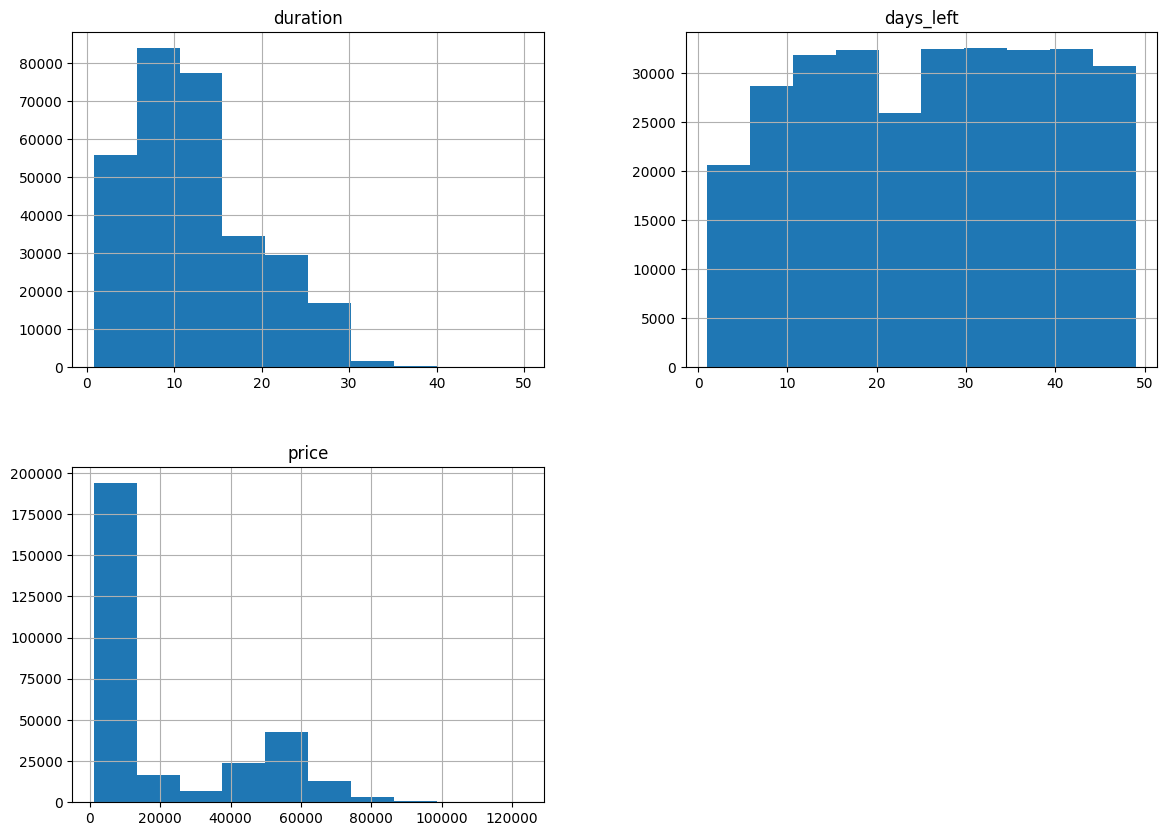

In [ ]:
df.hist(bins=10,figsize=(14,10))
plt.show()

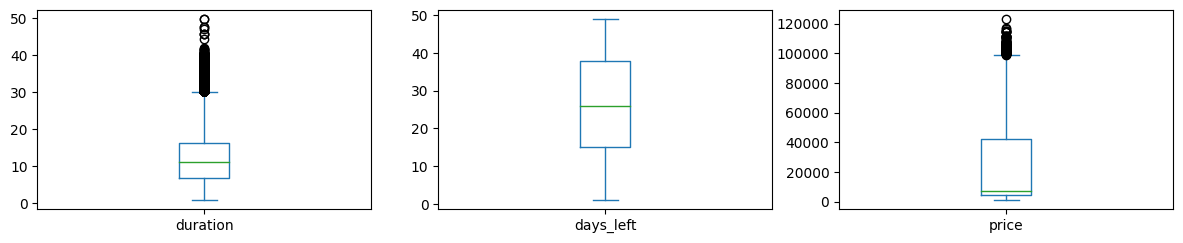

In [ ]:
df.plot(kind ="box",subplots=True,figsize=(25,15),layout=(5,5));

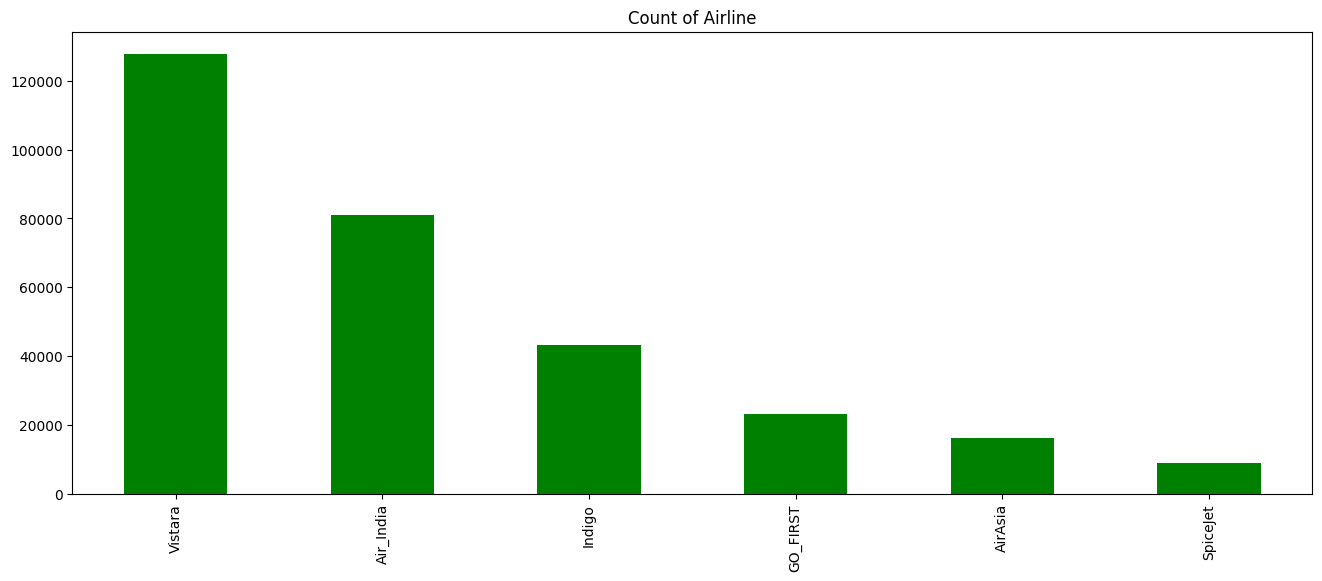

In [ ]:
plt.figure(figsize=(16,6))
plt.title("Count of Airline")
df["airline"].value_counts().plot(kind ="bar",color='green');

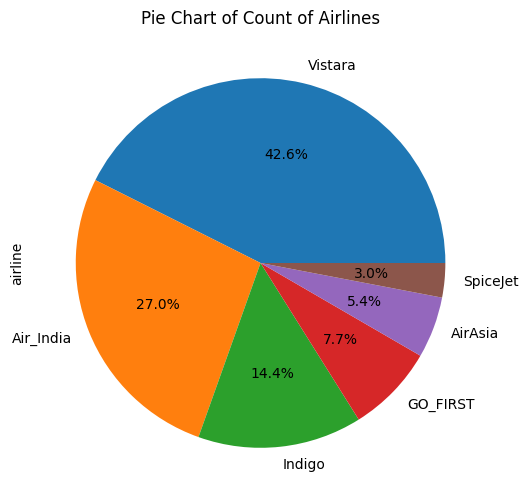

In [ ]:
plt.figure(figsize=(16,6))
plt.title("Pie Chart of Count of Airlines")
df["airline"].value_counts().plot(kind ="pie",autopct='%1.1f%%');

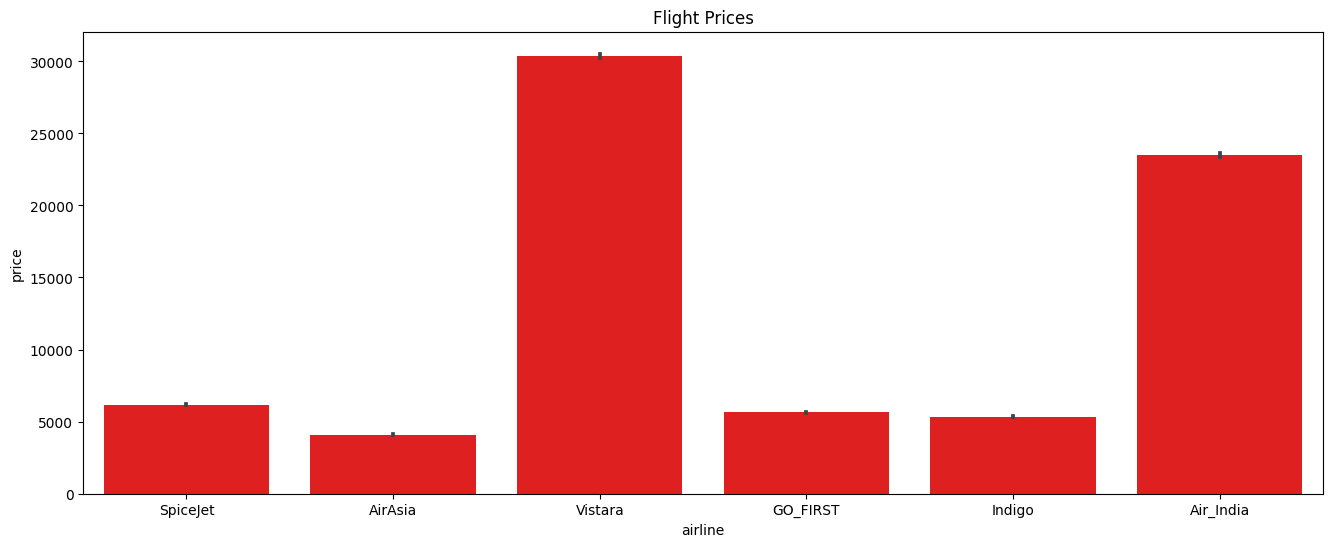

In [ ]:
plt.figure(figsize=(16,6))
plt.title("Flight Prices")
sns.barplot(x="airline", y="price",color='red',data=df);
plt.show()

In [ ]:
numer_df=df.select_dtypes(include=['number'])

In [ ]:
numer_df

,duration,days_left,price
0,2.17,1,5953
1,2.33,1,5953
2,2.17,1,5956
3,2.25,1,5955
4,2.33,1,5955
...,...,...,...
300148,10.08,49,69265
300149,10.42,49,77105
300150,13.83,49,79099
300151,10.00,49,81585


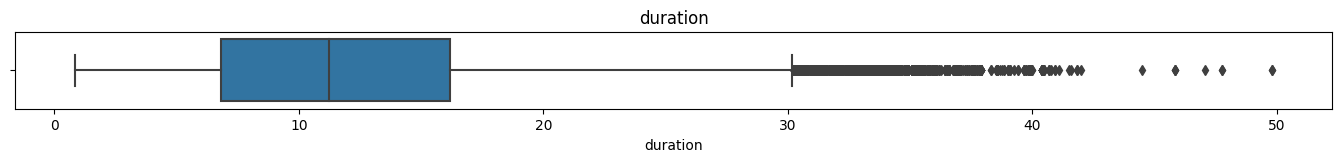

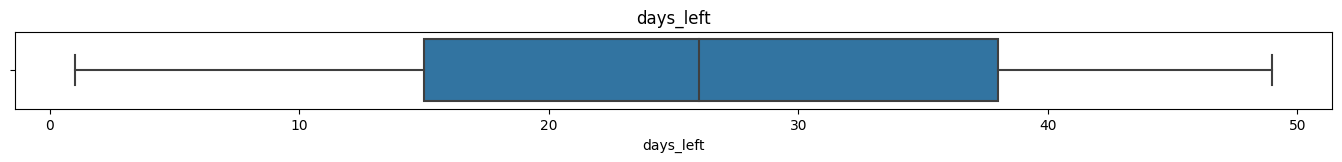

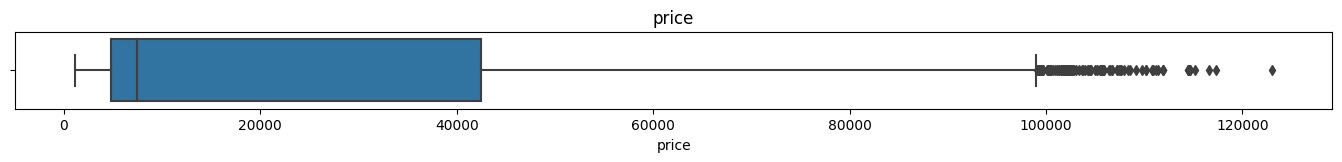

In [ ]:
for col in numer_df.columns:
  plt.figure(figsize=(17,1))
  sns.boxplot(data=df,x=col)
  plt.title(col)

In [ ]:
# for col in numer_df.columns:
#   lower=df[col].quantile(0.05)
#   upper=df[col].quantile(0.99)
#   df=df[(df[col]>lower) & (df[col]<upper)]

In [ ]:
df.reset_index(drop=True,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   source_city       300153 non-null  object 
 2   departure_time    300153 non-null  object 
 3   stops             300153 non-null  object 
 4   arrival_time      300153 non-null  object 
 5   destination_city  300153 non-null  object 
 6   class             300153 non-null  object 
 7   duration          300153 non-null  float64
 8   days_left         300153 non-null  int64  
 9   price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 22.9+ MB


In [ ]:
# for col in numer_df.columns:
#   q1=numer_df[col].quantile(0.25)
#   q3=df[col].quantile(0.75)
#   iqr=q3-q1
#   lower_whisker=q1-(1.5*iqr)
#   upper_whisker=q3+(1.5*iqr)
#   numer_df[col]=np.where(numer_df[col]>upper_whisker,upper_whisker, np.where(df[col]<lower_whisker,lower_whisker,numer_df[col]))

In [ ]:
airlines=[]
for i in df['airline']:
  airlines.append(i)

In [ ]:
airline_dict={'Airlines':airlines}

In [ ]:
airline_df=pd.DataFrame(airline_dict)

In [ ]:
numer_df['Airline']=airline_df

In [ ]:
numer_df.head()

,duration,days_left,price,Airline
0,2.17,1,5953,SpiceJet
1,2.33,1,5953,SpiceJet
2,2.17,1,5956,AirAsia
3,2.25,1,5955,Vistara
4,2.33,1,5955,Vistara


In [ ]:
airline_mean=numer_df.groupby('Airline').mean()

In [ ]:
airline_mean

,duration,days_left,price
Airline,,,
AirAsia,8.941714,27.735184,4091.072742
Air_India,15.504235,25.497466,23507.019112
GO_FIRST,8.755380,27.430415,5652.007595
Indigo,5.795197,26.264309,5324.216303
SpiceJet,12.579767,24.122850,6179.278881
Vistara,13.326634,25.894532,30396.536302


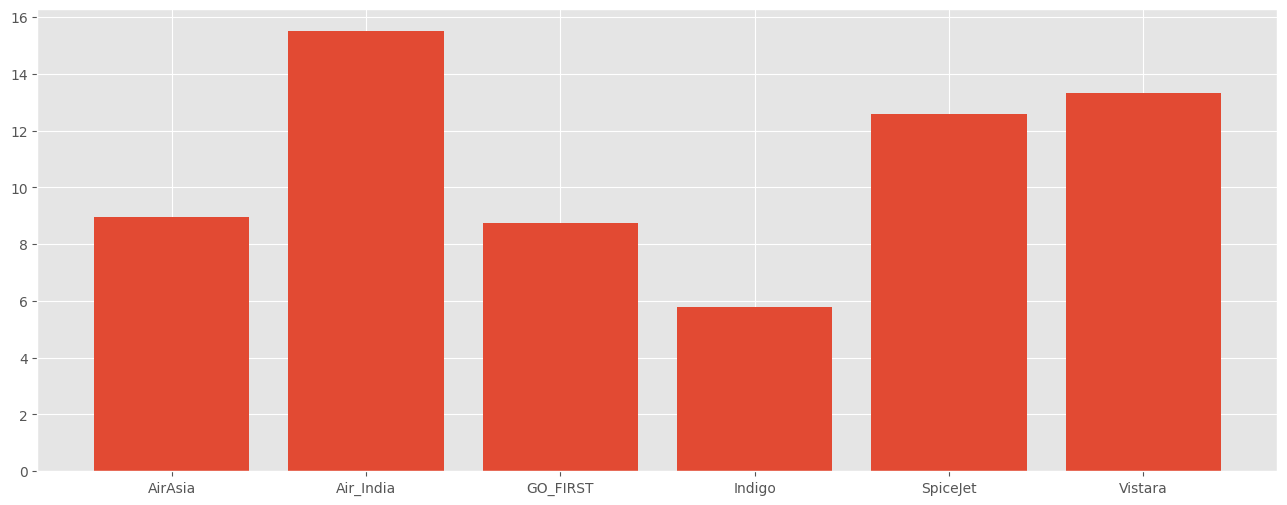

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(16,6))
plt.bar(airline_mean.index,airline_mean["duration"])
plt.show()

<Axes: xlabel='days_left', ylabel='price'>

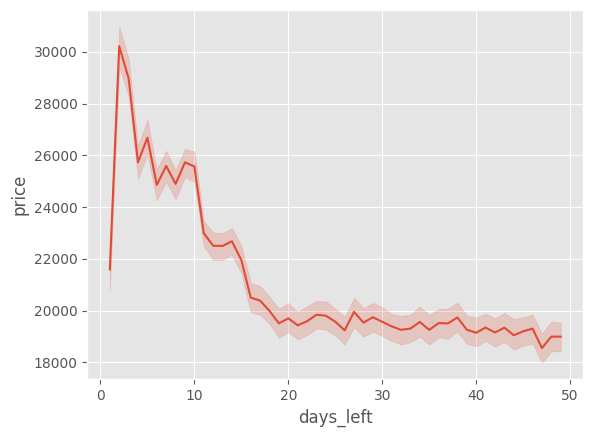

In [ ]:
sns.lineplot(x='days_left',y='price',data=df)

<Axes: xlabel='stops', ylabel='price'>

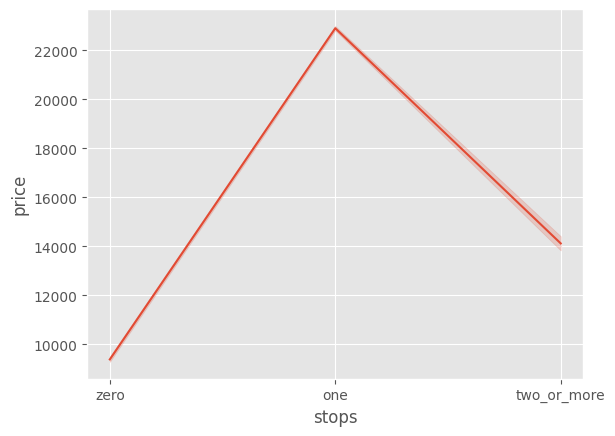

In [ ]:
sns.lineplot(x='stops',y='price',data=df)

<Axes: xlabel='airline', ylabel='price'>

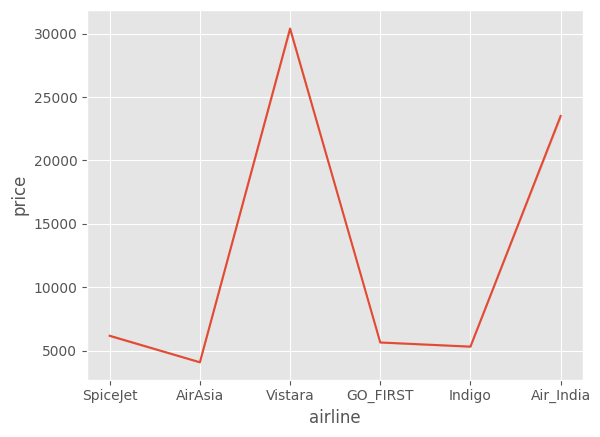

In [ ]:
sns.lineplot(x='airline',y='price',data=df)

<Axes: xlabel='departure_time', ylabel='price'>

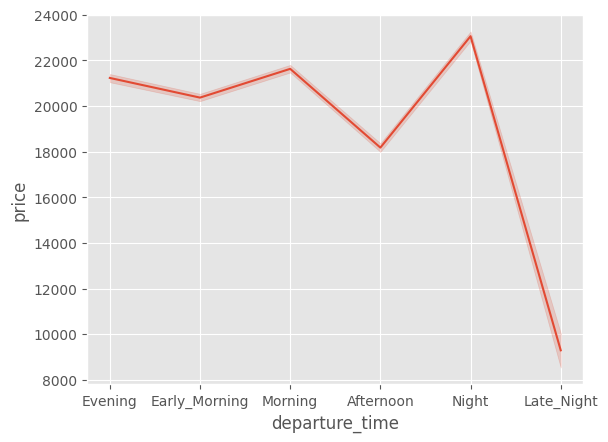

In [ ]:
sns.lineplot(x='departure_time',y='price',data=df)

<Axes: xlabel='arrival_time', ylabel='price'>

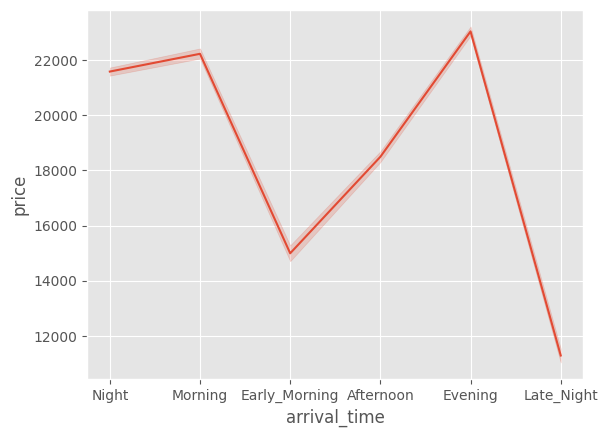

In [ ]:
sns.lineplot(x='arrival_time',y='price',data=df)

<Axes: xlabel='days_left', ylabel='price'>

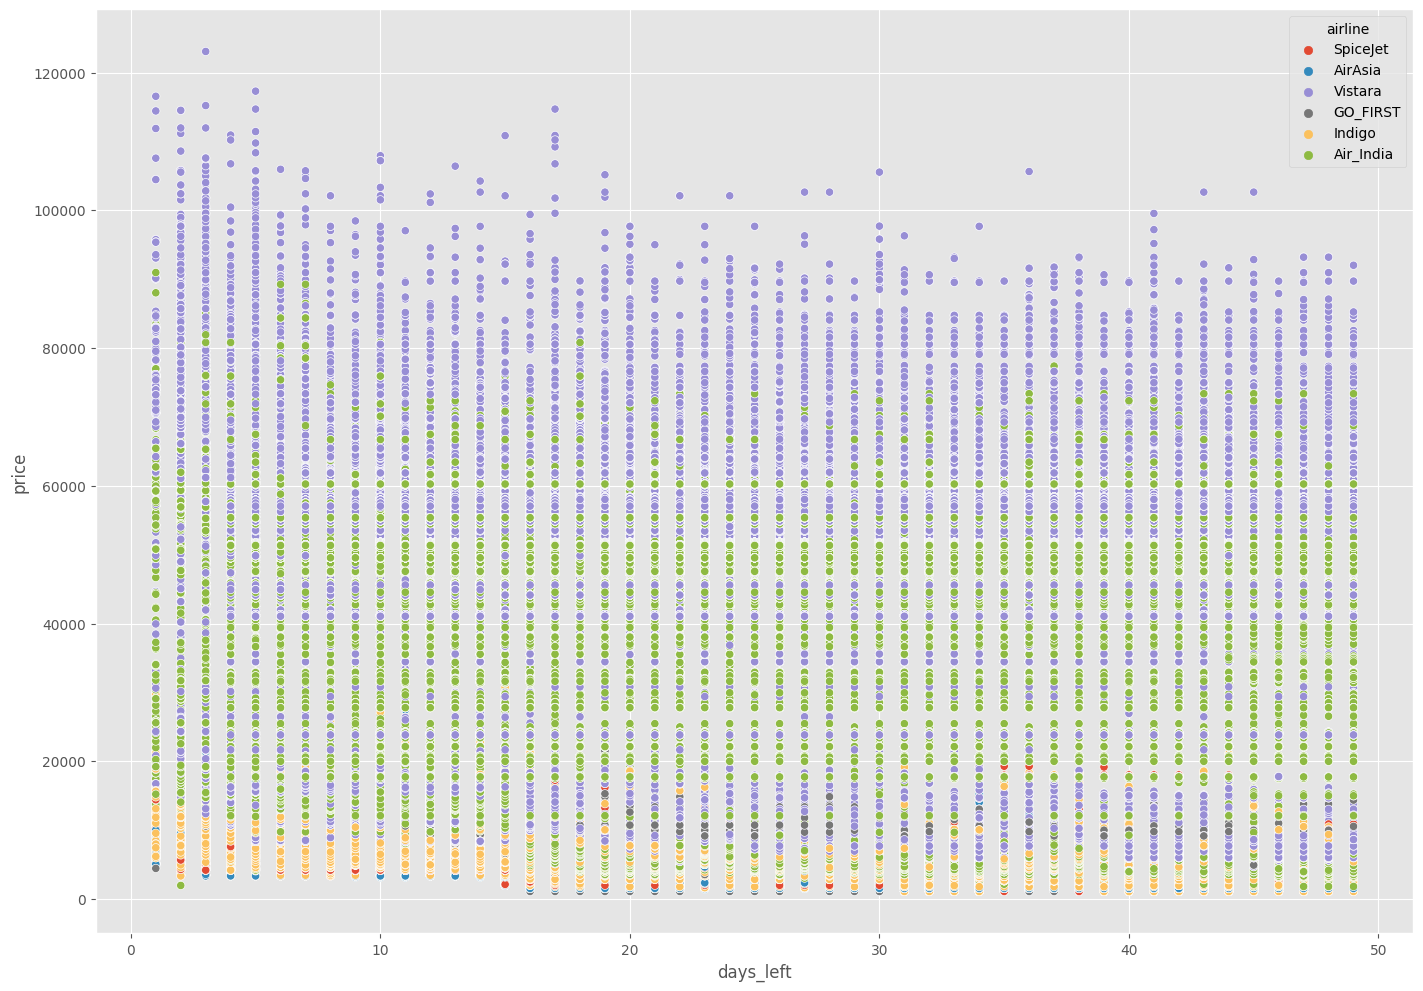

In [ ]:
plt.figure(figsize=(17,12))
sns.scatterplot(x=df['days_left'],y=df['price'],hue=df['airline'])

## MACHINE LEARNING

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
df['stops'].unique()

array(['zero', 'one', 'two_or_more'], dtype=object)

In [ ]:
def stopsconvert(num):
  if num=='zero':
    return 0
  elif num=='one':
    return 1
  else:
    return 2
df['stops']=df['stops'].apply(stopsconvert)

In [ ]:
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,0,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,0,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,0,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,0,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,0,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
# cols=['airline','source_city','departure_time','stops','arrival_time','destination_city','class']
cols=['airline','source_city','departure_time','arrival_time','destination_city','class']

In [ ]:
df_pred=df.copy()
df_pred.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,0,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,0,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,0,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,0,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,0,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
# for col in cols:
#   if col=='source_city':
#     add=pd.get_dummies(df[col],prefix='start')
#   elif col=='destination_city':
#     add=pd.get_dummies(df[col],prefix='end')
#   elif col=='departure_time':
#     add=pd.get_dummies(df[col],prefix='depart')
#   elif col=='arrival_time':
#     add=pd.get_dummies(df[col],prefix='arrival')
#   else:
#     add=pd.get_dummies(df[col])
#   df_pred=pd.concat([df_pred,add],axis=1)

In [ ]:
dummy=pd.get_dummies(df_pred['airline'])
df_pred=pd.concat([df_pred,dummy],axis=1)
df_pred.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,AirAsia,Air_India,GO_FIRST,Indigo,SpiceJet,Vistara
0,SpiceJet,Delhi,Evening,0,Night,Mumbai,Economy,2.17,1,5953,0,0,0,0,1,0
1,SpiceJet,Delhi,Early_Morning,0,Morning,Mumbai,Economy,2.33,1,5953,0,0,0,0,1,0
2,AirAsia,Delhi,Early_Morning,0,Early_Morning,Mumbai,Economy,2.17,1,5956,1,0,0,0,0,0
3,Vistara,Delhi,Morning,0,Afternoon,Mumbai,Economy,2.25,1,5955,0,0,0,0,0,1
4,Vistara,Delhi,Morning,0,Morning,Mumbai,Economy,2.33,1,5955,0,0,0,0,0,1


In [ ]:
dummy=pd.get_dummies(df_pred['source_city'],prefix='from')
df_pred=pd.concat([df_pred,dummy],axis=1)
df_pred.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,...,GO_FIRST,Indigo,SpiceJet,Vistara,from_Bangalore,from_Chennai,from_Delhi,from_Hyderabad,from_Kolkata,from_Mumbai
0,SpiceJet,Delhi,Evening,0,Night,Mumbai,Economy,2.17,1,5953,...,0,0,1,0,0,0,1,0,0,0
1,SpiceJet,Delhi,Early_Morning,0,Morning,Mumbai,Economy,2.33,1,5953,...,0,0,1,0,0,0,1,0,0,0
2,AirAsia,Delhi,Early_Morning,0,Early_Morning,Mumbai,Economy,2.17,1,5956,...,0,0,0,0,0,0,1,0,0,0
3,Vistara,Delhi,Morning,0,Afternoon,Mumbai,Economy,2.25,1,5955,...,0,0,0,1,0,0,1,0,0,0
4,Vistara,Delhi,Morning,0,Morning,Mumbai,Economy,2.33,1,5955,...,0,0,0,1,0,0,1,0,0,0


In [ ]:
dummy=pd.get_dummies(df_pred['destination_city'],prefix='to')
df_pred=pd.concat([df_pred,dummy],axis=1)
df_pred.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,...,from_Delhi,from_Hyderabad,from_Kolkata,from_Mumbai,to_Bangalore,to_Chennai,to_Delhi,to_Hyderabad,to_Kolkata,to_Mumbai
0,SpiceJet,Delhi,Evening,0,Night,Mumbai,Economy,2.17,1,5953,...,1,0,0,0,0,0,0,0,0,1
1,SpiceJet,Delhi,Early_Morning,0,Morning,Mumbai,Economy,2.33,1,5953,...,1,0,0,0,0,0,0,0,0,1
2,AirAsia,Delhi,Early_Morning,0,Early_Morning,Mumbai,Economy,2.17,1,5956,...,1,0,0,0,0,0,0,0,0,1
3,Vistara,Delhi,Morning,0,Afternoon,Mumbai,Economy,2.25,1,5955,...,1,0,0,0,0,0,0,0,0,1
4,Vistara,Delhi,Morning,0,Morning,Mumbai,Economy,2.33,1,5955,...,1,0,0,0,0,0,0,0,0,1


In [ ]:
dummy=pd.get_dummies(df_pred['class'])
df_pred=pd.concat([df_pred,dummy],axis=1)
df_pred.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,...,from_Kolkata,from_Mumbai,to_Bangalore,to_Chennai,to_Delhi,to_Hyderabad,to_Kolkata,to_Mumbai,Business,Economy
0,SpiceJet,Delhi,Evening,0,Night,Mumbai,Economy,2.17,1,5953,...,0,0,0,0,0,0,0,1,0,1
1,SpiceJet,Delhi,Early_Morning,0,Morning,Mumbai,Economy,2.33,1,5953,...,0,0,0,0,0,0,0,1,0,1
2,AirAsia,Delhi,Early_Morning,0,Early_Morning,Mumbai,Economy,2.17,1,5956,...,0,0,0,0,0,0,0,1,0,1
3,Vistara,Delhi,Morning,0,Afternoon,Mumbai,Economy,2.25,1,5955,...,0,0,0,0,0,0,0,1,0,1
4,Vistara,Delhi,Morning,0,Morning,Mumbai,Economy,2.33,1,5955,...,0,0,0,0,0,0,0,1,0,1


In [ ]:
dummy=pd.get_dummies(df_pred['departure_time'],prefix='depart')
df_pred=pd.concat([df_pred,dummy],axis=1)
df_pred.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,...,to_Kolkata,to_Mumbai,Business,Economy,depart_Afternoon,depart_Early_Morning,depart_Evening,depart_Late_Night,depart_Morning,depart_Night
0,SpiceJet,Delhi,Evening,0,Night,Mumbai,Economy,2.17,1,5953,...,0,1,0,1,0,0,1,0,0,0
1,SpiceJet,Delhi,Early_Morning,0,Morning,Mumbai,Economy,2.33,1,5953,...,0,1,0,1,0,1,0,0,0,0
2,AirAsia,Delhi,Early_Morning,0,Early_Morning,Mumbai,Economy,2.17,1,5956,...,0,1,0,1,0,1,0,0,0,0
3,Vistara,Delhi,Morning,0,Afternoon,Mumbai,Economy,2.25,1,5955,...,0,1,0,1,0,0,0,0,1,0
4,Vistara,Delhi,Morning,0,Morning,Mumbai,Economy,2.33,1,5955,...,0,1,0,1,0,0,0,0,1,0


In [ ]:
dummy=pd.get_dummies(df_pred['arrival_time'],prefix='arrival')
df_pred=pd.concat([df_pred,dummy],axis=1)
df_pred.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,...,depart_Evening,depart_Late_Night,depart_Morning,depart_Night,arrival_Afternoon,arrival_Early_Morning,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night
0,SpiceJet,Delhi,Evening,0,Night,Mumbai,Economy,2.17,1,5953,...,1,0,0,0,0,0,0,0,0,1
1,SpiceJet,Delhi,Early_Morning,0,Morning,Mumbai,Economy,2.33,1,5953,...,0,0,0,0,0,0,0,0,1,0
2,AirAsia,Delhi,Early_Morning,0,Early_Morning,Mumbai,Economy,2.17,1,5956,...,0,0,0,0,0,1,0,0,0,0
3,Vistara,Delhi,Morning,0,Afternoon,Mumbai,Economy,2.25,1,5955,...,0,0,1,0,1,0,0,0,0,0
4,Vistara,Delhi,Morning,0,Morning,Mumbai,Economy,2.33,1,5955,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
df_pred.drop(columns=['airline','source_city','departure_time','arrival_time','destination_city','class'],inplace=True)

In [ ]:
# df_new.head()

In [ ]:
# int_cols=['days_left','stops','price']
# df_pred=pd.concat([df_pred,df[int_cols]],axis=1)
# df_pred.reset_index(drop=True,inplace=True)

In [ ]:
df_pred.head()

,stops,duration,days_left,price,AirAsia,Air_India,GO_FIRST,Indigo,SpiceJet,Vistara,...,depart__Evening,depart__Late_Night,depart__Morning,depart__Night,arrival__Afternoon,arrival__Early_Morning,arrival__Evening,arrival__Late_Night,arrival__Morning,arrival__Night
0,0,2.17,1,5953,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
1,0,2.33,1,5953,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,2.17,1,5956,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,2.25,1,5955,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0
4,0,2.33,1,5955,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
y=df_pred['price']
X=df_pred.drop(columns=['price'])
X.columns

Index(['stops', 'duration', 'days_left', 'AirAsia', 'Air_India', 'GO_FIRST',
       'Indigo', 'SpiceJet', 'Vistara', 'from_Bangalore', 'from_Chennai',
       'from_Delhi', 'from_Hyderabad', 'from_Kolkata', 'from_Mumbai',
       'to_Bangalore', 'to_Chennai', 'to_Delhi', 'to_Hyderabad', 'to_Kolkata',
       'to_Mumbai', 'Business', 'Economy', 'depart_Afternoon',
       'depart_Early_Morning', 'depart_Evening', 'depart_Late_Night',
       'depart_Morning', 'depart_Night', 'arrival_Afternoon',
       'arrival_Early_Morning', 'arrival_Evening', 'arrival_Late_Night',
       'arrival_Morning', 'arrival_Night'],
      dtype='object')

In [ ]:
pred_cols=X.columns.tolist()

In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [ ]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
lr.score(X_test,y_test)

0.9099015009075401

In [ ]:
# from mlxtend.feature_selection import SequentialFeatureSelector
# lr_model=LinearRegression()
# feature_selector=SequentialFeatureSelector(lr_model,
#                                            k_features=20,
#                                            forward=True,
#                                            scoring='neg_mean_squared_error',
#                                            cv=5


#                                            )

In [ ]:
# feature_selector.fit(X_train,y_train)

In [ ]:
# selected_features = feature_selector.k_feature_names_
# selected_features

In [ ]:
# from sklearn import metrics
# print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
# print('MSE:', metrics.mean_squared_error(y_test, y_pred))
# print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
# metrics.r2_score(y_test, y_pred)

In [ ]:
# lr.predict()
len(pred_cols)

35

In [ ]:
import json
prediction={
    'pred_list':pred_cols
}
with open('/content/drive/MyDrive/Colab Notebooks/prediction_lits.json','w') as f:
    f.write(json.dumps(prediction))

In [ ]:
# pred_cols.remove('price')
print(pred_cols)
len(pred_cols)

['stops', 'duration', 'days_left', 'AirAsia', 'Air_India', 'GO_FIRST', 'Indigo', 'SpiceJet', 'Vistara', 'from_Bangalore', 'from_Chennai', 'from_Delhi', 'from_Hyderabad', 'from_Kolkata', 'from_Mumbai', 'to_Bangalore', 'to_Chennai', 'to_Delhi', 'to_Hyderabad', 'to_Kolkata', 'to_Mumbai', 'Business', 'Economy', 'depart_Afternoon', 'depart_Early_Morning', 'depart_Evening', 'depart_Late_Night', 'depart_Morning', 'depart_Night', 'arrival_Afternoon', 'arrival_Early_Morning', 'arrival_Evening', 'arrival_Late_Night', 'arrival_Morning', 'arrival_Night']


35

In [ ]:
df.columns

Index(['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city', 'class', 'duration', 'days_left', 'price'],
      dtype='object')

In [ ]:
user_pred=np.zeros(len(pred_cols))

print(user_pred)
depart='depart_Early_Morning'
arrival='arrival_Morning'
seat='Economy'
airline='Air_India'
start='from_Delhi'
end='to_Chennai'


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
temp_df=df[(df['destination_city']=='Chennai')&(df['source_city']=='Delhi')&(df['class']=='Economy')]
dur=temp_df['duration'].mode()
dur

0    2.83
Name: duration, dtype: float64

In [ ]:
temp_df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
35361,SpiceJet,Delhi,Early_Morning,0,Morning,Chennai,Economy,2.92,1,7425
35362,Vistara,Delhi,Early_Morning,0,Morning,Chennai,Economy,2.75,1,7425
35363,Vistara,Delhi,Afternoon,0,Evening,Chennai,Economy,2.83,1,7425
35364,Indigo,Delhi,Morning,0,Morning,Chennai,Economy,2.83,1,7425
35365,Indigo,Delhi,Afternoon,0,Afternoon,Chennai,Economy,2.92,1,7425


In [ ]:
seat_index=pred_cols.index(seat)
depart_index=pred_cols.index(depart)
arrival_index=pred_cols.index(arrival)
stop_index=pred_cols.index('stops')
start_index=pred_cols.index(start)
end_index=pred_cols.index(end)
days_index=pred_cols.index('days_left')
airline_index=pred_cols.index(airline)
dur=pred_cols.index('duration')
print(airline_index)

4


In [ ]:
user_pred[seat_index]=1
user_pred[depart_index]=1
user_pred[arrival_index]=1
user_pred[stop_index]=1
user_pred[start_index]=1
user_pred[end_index]=1
user_pred[days_index]=11
user_pred[airline_index]=1
user_pred[dur]=3

In [ ]:
float(lr.predict([user_pred]))

4903.57016577544

In [ ]:
from joblib import dump
dump(lr,'/content/drive/MyDrive/Colab Notebooks/lr.joblib')

['/content/drive/MyDrive/Colab Notebooks/lr.joblib']

In [ ]:
rand_for.predict([user_pred])

array([7216.79])

In [ ]:
df[(df['destination_city']=='Chennai')&(df['source_city']=='Delhi')]

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
35361,SpiceJet,Delhi,Early_Morning,0,Morning,Chennai,Economy,2.92,1,7425
35362,Vistara,Delhi,Early_Morning,0,Morning,Chennai,Economy,2.75,1,7425
35363,Vistara,Delhi,Afternoon,0,Evening,Chennai,Economy,2.83,1,7425
35364,Indigo,Delhi,Morning,0,Morning,Chennai,Economy,2.83,1,7425
35365,Indigo,Delhi,Afternoon,0,Afternoon,Chennai,Economy,2.92,1,7425
...,...,...,...,...,...,...,...,...,...,...
224977,Vistara,Delhi,Evening,1,Morning,Chennai,Business,15.08,49,68184
224978,Air_India,Delhi,Night,2,Morning,Chennai,Business,12.92,49,70323
224979,Vistara,Delhi,Early_Morning,2,Evening,Chennai,Business,12.83,49,71376
224980,Vistara,Delhi,Afternoon,2,Night,Chennai,Business,8.83,49,76684


In [ ]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_absolute_error

In [ ]:
df_pred.head()

,stops,duration,days_left,price,AirAsia,Air_India,GO_FIRST,Indigo,SpiceJet,Vistara,...,time_depart_Evening,time_depart_Late_Night,time_depart_Morning,time_depart_Night,time_arrival_Afternoon,time_arrival_Early_Morning,time_arrival_Evening,time_arrival_Late_Night,time_arrival_Morning,time_arrival_Night
0,0,2.17,1,5953,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
1,0,2.33,1,5953,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,2.17,1,5956,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,2.25,1,5955,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0
4,0,2.33,1,5955,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
df_sample=df_pred.sample(n=20000,replace=False)

In [ ]:
df_sample.reset_index(drop=True,inplace=True)
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   stops                       20000 non-null  int64  
 1   duration                    20000 non-null  float64
 2   days_left                   20000 non-null  int64  
 3   price                       20000 non-null  int64  
 4   AirAsia                     20000 non-null  uint8  
 5   Air_India                   20000 non-null  uint8  
 6   GO_FIRST                    20000 non-null  uint8  
 7   Indigo                      20000 non-null  uint8  
 8   SpiceJet                    20000 non-null  uint8  
 9   Vistara                     20000 non-null  uint8  
 10  from_Bangalore              20000 non-null  uint8  
 11  from_Chennai                20000 non-null  uint8  
 12  from_Delhi                  20000 non-null  uint8  
 13  from_Hyderabad              200

In [ ]:
y=df_sample['price']
X=df_sample.drop(columns='price')

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rand_for=RandomForestRegressor(n_estimators=100)

In [ ]:
rand_for.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
rand_for.score(X_test,y_test)

0.9710376391764542

In [ ]:
cols=[
 'departure_time','arrival_time',
 'class']

In [ ]:
df_rec=pd.DataFrame()

In [ ]:
for col in cols:
  # if col=='source_city':
  #   add=pd.get_dummies(df[col],prefix='start')
  # elif col=='destination_city':
  #   add=pd.get_dummies(df[col],prefix='end')
  if col=='departure_time':
    add=pd.get_dummies(df[col],prefix='depart')
  elif col=='arrival_time':
    add=pd.get_dummies(df[col],prefix='arrival')
  else:
    add=pd.get_dummies(df[col])
  df_rec=pd.concat([df_rec,add],axis=1)
df_rec=pd.concat([df['airline'],df['source_city'],df['destination_city'],df_rec],axis=1)

In [ ]:
df_rec.head()

,airline,source_city,destination_city,depart_Afternoon,depart_Early_Morning,depart_Evening,depart_Late_Night,depart_Morning,depart_Night,arrival_Afternoon,arrival_Early_Morning,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night,Business,Economy
0,SpiceJet,Delhi,Mumbai,0,0,1,0,0,0,0,0,0,0,0,1,0,1
1,SpiceJet,Delhi,Mumbai,0,1,0,0,0,0,0,0,0,0,1,0,0,1
2,AirAsia,Delhi,Mumbai,0,1,0,0,0,0,0,1,0,0,0,0,0,1
3,Vistara,Delhi,Mumbai,0,0,0,0,1,0,1,0,0,0,0,0,0,1
4,Vistara,Delhi,Mumbai,0,0,0,0,1,0,0,0,0,0,1,0,0,1


In [ ]:
# df_rec.to_csv('recommendation.csv')

In [ ]:
airlines=df_rec['airline'].tolist()

In [ ]:
# import json
# airline_names = {
#     'airlines' : [flight for flight in airlines]
# }


In [ ]:
# with open('/content/drive/MyDrive/Colab Notebooks/airline_names.json','w') as f:
#     f.write(json.dumps(airline_names))

In [ ]:
df_updated=pd.concat([df_rec,df['duration'],df['stops'],df['days_left']],axis=1)
df_updated.head()

,airline,source_city,destination_city,depart_Afternoon,depart_Early_Morning,depart_Evening,depart_Late_Night,depart_Morning,depart_Night,arrival_Afternoon,arrival_Early_Morning,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night,Business,Economy,duration,stops,days_left
0,SpiceJet,Delhi,Mumbai,0,0,1,0,0,0,0,0,0,0,0,1,0,1,2.17,0,1
1,SpiceJet,Delhi,Mumbai,0,1,0,0,0,0,0,0,0,0,1,0,0,1,2.33,0,1
2,AirAsia,Delhi,Mumbai,0,1,0,0,0,0,0,1,0,0,0,0,0,1,2.17,0,1
3,Vistara,Delhi,Mumbai,0,0,0,0,1,0,1,0,0,0,0,0,0,1,2.25,0,1
4,Vistara,Delhi,Mumbai,0,0,0,0,1,0,0,0,0,0,1,0,0,1,2.33,0,1


In [ ]:
# df_updated.to_csv('recommendation.csv',index=False)
df_updated.iloc[:,3:-1]

,depart_Afternoon,depart_Early_Morning,depart_Evening,depart_Late_Night,depart_Morning,depart_Night,arrival_Afternoon,arrival_Early_Morning,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night,Business,Economy,duration,stops
0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,2.17,0
1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,2.33,0
2,0,1,0,0,0,0,0,1,0,0,0,0,0,1,2.17,0
3,0,0,0,0,1,0,1,0,0,0,0,0,0,1,2.25,0
4,0,0,0,0,1,0,0,0,0,0,1,0,0,1,2.33,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,0,0,0,0,1,0,0,0,1,0,0,0,1,0,10.08,1
300149,1,0,0,0,0,0,0,0,0,0,0,1,1,0,10.42,1
300150,0,1,0,0,0,0,0,0,0,0,0,1,1,0,13.83,1
300151,0,1,0,0,0,0,0,0,1,0,0,0,1,0,10.00,1


In [ ]:
def cosine(a,b):
  dot=np.dot(a,b)
  norm_a=np.linalg.norm(a)
  norm_b=np.linalg.norm(b)
  return dot/(norm_a*norm_b)

In [ ]:
df_sort=df_updated[(df_updated['source_city']=='Delhi') & (df_updated['destination_city']=='Mumbai')]
# df_sort.reset_index(drop=True,inplace=True)
df_sort.head()

,airline,source_city,destination_city,depart_Afternoon,depart_Early_Morning,depart_Evening,depart_Late_Night,depart_Morning,depart_Night,arrival_Afternoon,arrival_Early_Morning,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night,Business,Economy,duration,stops,days_left
0,SpiceJet,Delhi,Mumbai,0,0,1,0,0,0,0,0,0,0,0,1,0,1,2.17,0,1
1,SpiceJet,Delhi,Mumbai,0,1,0,0,0,0,0,0,0,0,1,0,0,1,2.33,0,1
2,AirAsia,Delhi,Mumbai,0,1,0,0,0,0,0,1,0,0,0,0,0,1,2.17,0,1
3,Vistara,Delhi,Mumbai,0,0,0,0,1,0,1,0,0,0,0,0,0,1,2.25,0,1
4,Vistara,Delhi,Mumbai,0,0,0,0,1,0,0,0,0,0,1,0,0,1,2.33,0,1


In [ ]:
df_sort.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15289 entries, 0 to 211972
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   airline                15289 non-null  object 
 1   source_city            15289 non-null  object 
 2   destination_city       15289 non-null  object 
 3   depart_Afternoon       15289 non-null  uint8  
 4   depart_Early_Morning   15289 non-null  uint8  
 5   depart_Evening         15289 non-null  uint8  
 6   depart_Late_Night      15289 non-null  uint8  
 7   depart_Morning         15289 non-null  uint8  
 8   depart_Night           15289 non-null  uint8  
 9   arrival_Afternoon      15289 non-null  uint8  
 10  arrival_Early_Morning  15289 non-null  uint8  
 11  arrival_Evening        15289 non-null  uint8  
 12  arrival_Late_Night     15289 non-null  uint8  
 13  arrival_Morning        15289 non-null  uint8  
 14  arrival_Night          15289 non-null  uint8  
 15  B

In [ ]:
matrix=df_sort.iloc[:,3:-1]
cols=matrix.columns.tolist()
len(cols)

16

In [ ]:
cols

['depart_Afternoon',
 'depart_Early_Morning',
 'depart_Evening',
 'depart_Late_Night',
 'depart_Morning',
 'depart_Night',
 'arrival_Afternoon',
 'arrival_Early_Morning',
 'arrival_Evening',
 'arrival_Late_Night',
 'arrival_Morning',
 'arrival_Night',
 'Business',
 'Economy',
 'duration',
 'stops']

In [ ]:
matrix=matrix.to_numpy()
matrix

array([[ 0.  ,  0.  ,  1.  , ...,  1.  ,  2.17,  0.  ],
       [ 0.  ,  1.  ,  0.  , ...,  1.  ,  2.33,  0.  ],
       [ 0.  ,  1.  ,  0.  , ...,  1.  ,  2.17,  0.  ],
       ...,
       [ 0.  ,  1.  ,  0.  , ...,  0.  ,  6.75,  1.  ],
       [ 0.  ,  1.  ,  0.  , ...,  0.  , 14.08,  1.  ],
       [ 0.  ,  0.  ,  1.  , ...,  0.  ,  6.  ,  1.  ]])

In [ ]:
user_rate=np.zeros(len(cols))
len(user_rate)

16

In [ ]:
cols

['depart_Afternoon',
 'depart_Early_Morning',
 'depart_Evening',
 'depart_Late_Night',
 'depart_Morning',
 'depart_Night',
 'arrival_Afternoon',
 'arrival_Early_Morning',
 'arrival_Evening',
 'arrival_Late_Night',
 'arrival_Morning',
 'arrival_Night',
 'Business',
 'Economy',
 'duration',
 'stops']

In [ ]:
depart='depart_Afternoon'
arrival='arrival_Evening'
seat='Economy'
days='days_left'

In [ ]:
seat_index=cols.index(seat)
depart_index=cols.index(depart)
arrival_index=cols.index(arrival)
stop_index=cols.index('stops')
# price_index=cols.index('price')
# days_index=cols.index(days)
duration_index=cols.index('duration')

In [ ]:
user_rate[seat_index]=1
user_rate[depart_index]=1
user_rate[arrival_index]=1
user_rate[stop_index]=0
# user_rate[price_index]=4000
# user_rate[days_index]=1
user_rate[duration_index]=2

In [ ]:
similarities = [cosine(user_rate, user) for user in matrix]
similarities[:5]

[0.7269357557565409,
 0.7368548738659256,
 0.7269357557565409,
 0.732114158203694,
 0.7368548738659256]

In [ ]:
N=10
top_airlines=np.argsort(similarities)[::-1][:N]
top_airlines[:10]

array([4232, 4885, 4671, 4015, 9661, 5971, 6826, 8333, 3585, 6401])

In [ ]:
rec_airline=[]
for i in top_airlines:
  if airlines[i+1] not in rec_airline:
    rec_airline.append(airlines[i+1])

print(rec_airline)

['GO_FIRST', 'Indigo']


In [ ]:
df_sort.iloc[352,:]

In [ ]:
df_pred.to_csv('prediction_dataset.csv',index=False)